In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [99]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [100]:
corr = bos.corr()

In [101]:
## Cheking Correlation of Dependant Variable

In [102]:
corr['Price'].sort_values(ascending = False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

After RM (average number of rooms), LSTAT (lower status of the population) is well (negatively) correlated with Price than the other features.

So it's like if the low status people are living more at a particular house, then its price is low

We'll just look at the absolute values of the correlation

In [103]:
corr_values = corr['Price'].abs().sort_values(ascending = False)
corr_values

Price      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Price, dtype: float64

## Data Standardization

In [104]:
from sklearn import preprocessing
x_RM = preprocessing.scale(bos['RM'])
x_LSTAT = preprocessing.scale(bos['LSTAT'])
y = preprocessing.scale(bos['Price'])

**Plotting both features in same graph**

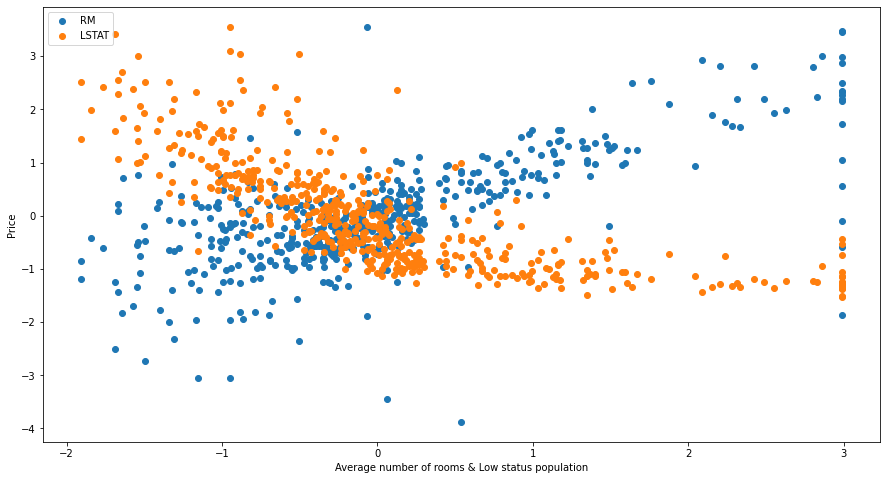

In [105]:
plt.figure(figsize=(15,8))
plt.scatter(y, x_RM, label = 'RM')
plt.scatter(y, x_LSTAT, label = 'LSTAT')
plt.legend()
plt.xlabel('Average number of rooms & Low status population')
plt.ylabel('Price')
plt.legend()
plt.show()

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [107]:
lr.coef_,lr.intercept_

(array([ 0.        , -0.73766273]), -6.372330862209178e-16)

In [108]:
predict = lr.predict(x)
mse = mean_squared_error(y,predict)
mse

0.45585370241352025

## Gradient Descent From Scratch

**Step 1 : Adding column of ones to x vector**

In [117]:
x = np.c_[np.ones(x_RM.shape[0]), x_RM,x_LSTAT]

np.c_
Translates slice objects to concatenation along the second axis.

This is short-hand for np.r_['-1,2,0', index expression], which is useful because of its common occurrence. In particular, arrays will be stacked along their last axis after being upgraded to at least 2-D with 1’s post-pended to the shape (column vectors made out of 1-D arrays).

In [118]:
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(3)  #initializing theta with some random values

**Step 5,6,7**

In [119]:
def gradient_descent(x,y,m,theta,alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   #predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [120]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

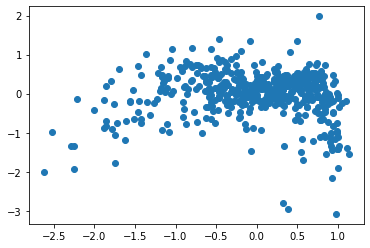

In [121]:
plt.scatter(predict,error)
plt.show()

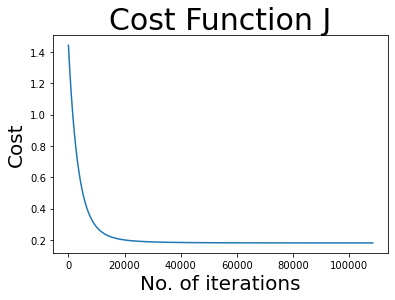

In [122]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

**Step 3 : Using prediction equation**

In [123]:
y_pred = theta[0] +theta[1]*x[:,1] + theta[2]*x[:,2]

**Step 4 : Mean Square of Residuals**

In [124]:
#Using y_pred from prediction equation 
MSE_e = ((y_pred-y)**2).mean()  
#From Gradient Descent
MSE_GD = ((prediction_list[-1]-y)**2).mean()  


print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_e,7)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,7)))

Mean Square Error using equation of hyperplane : 0.3614643
Mean Square Error from Gradient Descent prediction : 0.3614643
